In [3]:
# Imports
import matplotlib.pyplot   as plt
import numpy               as np
import numpy.random        as rd
import sklearn.datasets    as dt
import scipy.linalg as la


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression
from sklearn.linear_model  import Lasso
from sklearn.metrics       import confusion_matrix

In [4]:
import pickle

q = pickle.load(open('A45977_Ficha4_Respostas.p', 'rb'))

q['Q001'][0,:]=np.array([0,1,0,0])
q['Q001'][1,:]=np.array([0,1,0,0])
q['Q001'][2,:]=np.array([0,0,0,1])

q['Q002'][0,:]=np.array([1,0,0,0])
q['Q002'][1,:]=np.array([1,0,1,0])

q['Q003'][0,:]=np.array([0,0,0,1])
q['Q003'][1,:]=np.array([1,0,0,0])
q['Q003'][2,:]=np.array([1,0,0,0])

pickle.dump(q,open('A45977_Ficha4_Respostas.p','wb'))

# Pergunta 1

In [5]:
D = pickle.load(open('A45977_Q001_data.p','rb'))
x = D['X']
y = D['y']

# X =  1
#     x1
#     x2      >>    x já tem 2 dimensões/linhas, logo basta colocar um array de 1s acima
X = np.vstack((np.ones(x.shape[1]), x))
idx = np.argsort(y)
y = y[idx]
X = X[:,idx]

# Colocar w0 a -1 de modo a comparar posteriormente
y[y==0] = -1

# a) ii

In [6]:
w = np.array([0.00, 0.89, 0.45])
ye = np.dot(w.T, X)

Ye = ye.copy()
Ye[ye < 0] = -1
Ye[ye >= 0] = 1

CM = confusion_matrix(y, Ye)
print(CM)
print('\ni) O número de acertos na classe w0 é de 407:', CM[0, 0])
print('ii) O valor do recall é de 0.858:', round(CM[1, 1]/(CM[1, 1]+CM[1, 0]), 3))


[[ 418  133]
 [ 256 1552]]

i) O número de acertos na classe w0 é de 407: 418
ii) O valor do recall é de 0.858: 0.858


# b) ii

In [7]:
w = np.array([0.00, 0.61, 0.79])
ye = np.dot(w.T, X)

Ye = ye.copy()
Ye[ye < 0] = -1
Ye[ye >= 0] = 1

CM = confusion_matrix(y, Ye)
print(CM)
print('\ni) A taxa de falsos alarmes é de 0.045:', 70/(70+544+1738+7))
print('ii) O número total de acertos é de 2282:', 544 + 1738)
print('iii) O número de erros na classe w1 é de 78:', CM[1, 0])
print('iv) O valor da precisão é de 0.986:', (544 + 1738)/(70+544+1738+7))

[[ 544    7]
 [  70 1738]]

i) A taxa de falsos alarmes é de 0.045: 0.02967359050445104
ii) O número total de acertos é de 2282: 2282
iii) O número de erros na classe w1 é de 78: 70
iv) O valor da precisão é de 0.986: 0.9673590504451038


# c) iv

In [8]:
Rx   = np.dot(X, X.T)
rxy  = np.dot(X, y.T)
wMSE = np.dot(la.pinv(Rx), rxy)

ye = np.dot(wMSE.T, X)
Ye = ye.copy()

Ye[ye<0]  = -1
Ye[ye>=0] =  1

CM = confusion_matrix(y, Ye)
print(CM)
print('\ni) O número de acertos na classe w1 é de 1802:', CM[1, 1])
print('ii) O vetor que minimiza o erro quadrático médio é wMSE = [−0.760, 1.105, 1.225]', wMSE)

[[ 357  194]
 [   0 1808]]

i) O número de acertos na classe w1 é de 1802: 1808
ii) O vetor que minimiza o erro quadrático médio é wMSE = [−0.760, 1.105, 1.225] [0.23988649 0.10517952 0.22525089]


# Pergunta 2

Text(0.5, 1.0, 'Dados')

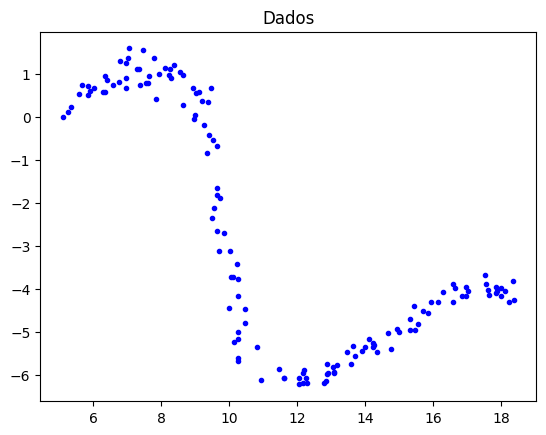

In [9]:
D = pickle.load(open('A45977_Q002_data.p','rb'))
x = D['x']
y = D['y']
f = D['folds']

plt.plot(x, y, '.', color='b')
plt.title('Dados')


# a) i

In [10]:
# treino
x1 = x[f==1]
y1 = y[f==1]
# teste
x2 = x[f==0]
y2 = y[f==0]

# Adicionar 2ª dimensão
X1 = x1[:,np.newaxis]
X2 = x2[:,np.newaxis]

# Estimar polinomio com os dados de treino
poly = PolynomialFeatures(degree=3).fit(X1)
X1a  = poly.transform(X1)
X2a  = poly.transform(X2)

# Fazer a regressão linear
lr = LinearRegression().fit(X1a, y1)
y1e = lr.predict(X1a)
y2e = lr.predict(X2a)

print('i) No conjunto de treino, o coeficiente de determinação, R2, é igual a 0.81:', round(lr.score(X1a,y1), 2))
print('ii) No conjunto de treino, o erro absoluto medio é igual a 1.37:', round(np.mean(np.abs(y1-y1e)), 2))

# Alínea c)

i) No conjunto de treino, o coeficiente de determinação, R2, é igual a 0.81: 0.81
ii) No conjunto de treino, o erro absoluto medio é igual a 1.37: 0.97


# b) i

In [11]:
# treino
x1 = x[f==1]
y1 = y[f==1]
# teste
x2 = x[f==0]
y2 = y[f==0]

# Adicionar 2ª dimensão
X1 = x1[:,np.newaxis]
X2 = x2[:,np.newaxis]

# Estimar polinomio com os dados de treino
poly = PolynomialFeatures(degree=4).fit(X1)
X1a  = poly.transform(X1)
X2a  = poly.transform(X2)

# Fazer a regressão linear
lr = LinearRegression().fit(X1a, y1)
y1e = lr.predict(X1a)
y2e = lr.predict(X2a)

print('i) Arredondando a zero casas decimais, o valor de w0 é -98:', round(lr.intercept_))
print('ii) No conjunto de treino, o erro absoluto médio é igual a 1.14:', round(np.mean((y1-y1e)**2), 2))

# Alínea c)

i) Arredondando a zero casas decimais, o valor de w0 é -98: -98
ii) No conjunto de treino, o erro absoluto médio é igual a 1.14: 0.66


# Pergunta 3

In [12]:
D = dt.load_diabetes()
#print(D.keys())
X = D.data
y = D.target

# Primeiras 243 para treino, resto teste...
X1, X2 = X[:240,:], X[240:, :]
y1, y2 = y[:240],   y[240:]

# a) iv

In [13]:
poly = PolynomialFeatures(degree=2).fit(X1)
X1a  = poly.transform(X1)
X2a  = poly.transform(X2)
rl   = LinearRegression().fit(X1a, y1)
y1e  = rl.predict(X1a)
y2e  = rl.predict(X2a)

print('i) No conjunto de teste, o erro quadrático médio é igual a 10023.71:', round(np.mean((y2-y2e)**2), 2))
print('ii) No conjunto de treino, o erro quadrático médio é igual a 5470.19:  ', round(np.mean((y1-y1e)**2), 2))

i) No conjunto de teste, o erro quadrático médio é igual a 10023.71: 3706.54
ii) No conjunto de treino, o erro quadrático médio é igual a 5470.19:   2176.71


# b) i

In [14]:
print('i) O número de coeficientes, incluindo w0, numa regressão polinomial de ordem 3, é igual a 286:  ',  PolynomialFeatures(degree=3).fit(X1).n_output_features_)
print('ii) O número de coeficientes, incluindo w0, numa regressão polinomial de ordem 4, é igual a 995: ',  PolynomialFeatures(degree=4).fit(X1).n_output_features_)

i) O número de coeficientes, incluindo w0, numa regressão polinomial de ordem 3, é igual a 286:   286
ii) O número de coeficientes, incluindo w0, numa regressão polinomial de ordem 4, é igual a 995:  1001


# c) i

In [15]:
from sklearn.metrics import mean_absolute_error

poly = PolynomialFeatures(degree=3).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)
l = Lasso(random_state=42, alpha=0.01).fit(X1a,y1)
y_pred = l.predict(X1a)

mae = np.round(mean_absolute_error(y1, y_pred), 2)

print("i) No conjunto de treino, o coeficiente de determinação, R2, é igual a 0.51:  ", round(l.score(X1a, y1), 2))
print("ii) No conjunto de treino, o erro absoluto médio é igual a 73.32: ", mae)

i) No conjunto de treino, o coeficiente de determinação, R2, é igual a 0.51:   0.51
ii) No conjunto de treino, o erro absoluto médio é igual a 73.32:  42.49


In [16]:
QuestDic=pickle.load(open('A45977_Ficha4_Respostas.p','rb'))
# Pergunta 1
print('1a):', np.where(QuestDic['Q001'][0,:] == 1)[0][0] + 1)
print('1b):', np.where(QuestDic['Q001'][1,:] == 1)[0][0] + 1)
print('1c):', np.where(QuestDic['Q001'][2,:] == 1)[0][0] + 1)
print()
print('2a):', np.where(QuestDic['Q002'][0,:] == 1)[0][0] + 1)
print('2b):', np.where(QuestDic['Q002'][1,:] == 1)[0][0] + 1)
print()
print('3a):', np.where(QuestDic['Q003'][0,:] == 1)[0][0] + 1)
print('3b):', np.where(QuestDic['Q003'][1,:] == 1)[0][0] + 1)
print('3c):', np.where(QuestDic['Q003'][2,:] == 1)[0][0] + 1)


1a): 2
1b): 2
1c): 4

2a): 1
2b): 1

3a): 4
3b): 1
3c): 1
